In [1]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from ganrectf.utils import angles, display_strain_tensor
from ganrectf.ganrec import GANtensor

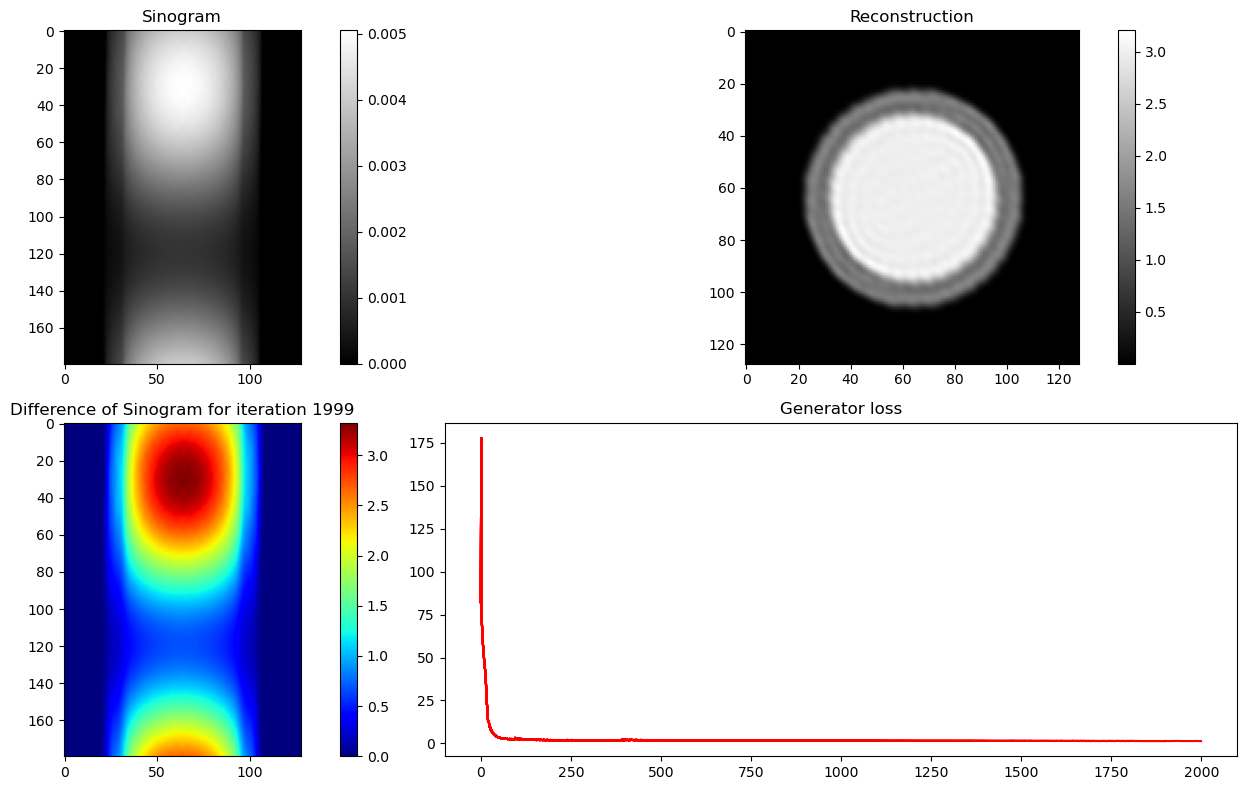

<Figure size 640x480 with 0 Axes>

Reconstruction Progress: 100%|██████████| 2000/2000 [00:24<00:00, 80.50it/s, D_loss=1.38, G_loss=1.34] 


In [2]:
prj = tifffile.imread('/nsls2/users/xyang4/data_tmp/tensor_tomography/strain_sino_tf_3.tiff')
psi = 90
psi = psi * np.pi / 180
nang, px = prj.shape
ang = angles(nang)
# prj = nor_tomo(prj)
rec = GANtensor(prj, ang, psi, iter_num=2000).recon
tifffile.imwrite('/nsls2/users/xyang4/data_tmp/tensor_tomography/strain_recon.tiff', rec)

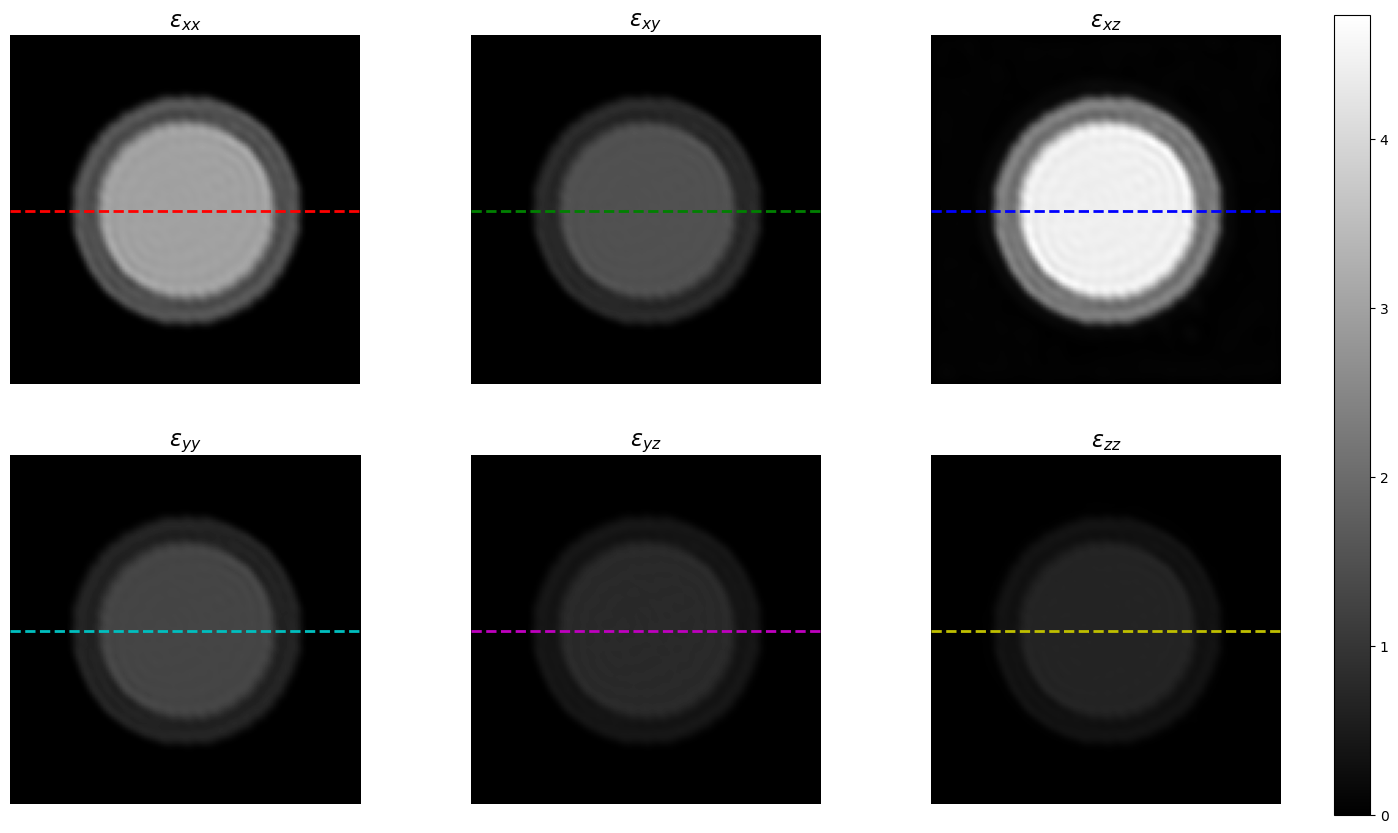

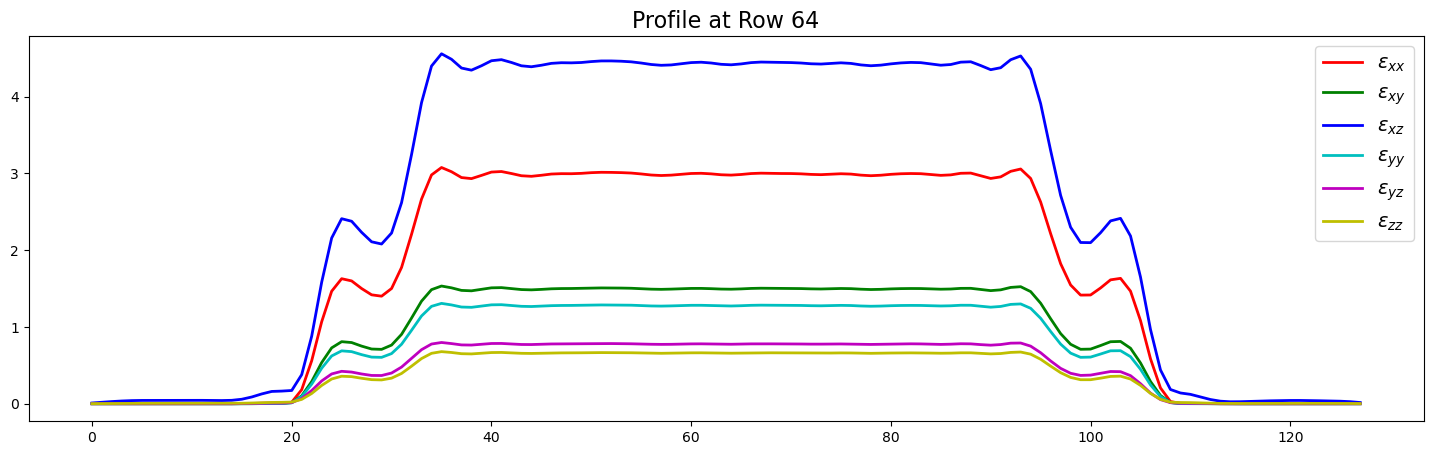

In [3]:
display_strain_tensor(rec)